[(précédent)](04%20-%20-%20-%20Python%20-%20tools%20-%20for%20-%20data%20-%20analysis.ipynb) | [(index)](00%20-%20-%20-%20Introduction%20-%20to%20-%20Python.ipynb) | [(suivant)](06%20-%20-%20-%20JavaScript%20-%20tools%20-%20for%20-%20visualisation.ipynb)

# Introduction à la méthodologie scientifique appliquée aux données

<div class="alert alert-block alert-warning">
    <b>Objectifs d'apprentissage :</b>
    <br>
    <ul>
        <li>Explorer et manipuler des données pour découvrir leurs métadonnées, leurs formes et leur solidité.</li>
        <li>Identifier une représentation appropriée et présenter les données pour en illustrer les caractéristiques principales.</li>
        <li>Construire et présenter une analyse à base de données utilisant Numpy, Pandas et Matplotlib.</li>
    </ul>
</div>

Il existe un certain nombre d'outils que les *data scientists* utilisent pour comprendre et analyser les données. Nous les aborderons, mais la première chose est toujours de commencer par explorer un jeu de données.

## Exploration initiale

En général, dans les formations sur les données, on vous présente un jeu de données propre et bien organisé, sur lequel on peut faire tourner des algorithmes et obtenir des réponses. Cette approche n'est pas utile. À part pour les données que vous collectez vous-même, il est peu probable que vous connaissiez la forme et le contenu du jeu données que vous importez d'autres sources, ni la qualité de leur travail de recherche.

En particulier pour un jeu de données de grande taille, il peut être difficile de savoir combien d'entrées uniques il contient, et comment ses entrées sont liées les unes aux autres.
<br>
<div class="well">
<b><i>Cas d'usage</i></b>: Répondre à des problématiques de santé publique sévères exige une surveillance constante.  Le <a href="https://data.humdata.org/">Humanitarian Data Exchange</a> (bourse aux données humanitaires) est mis à disposition par l'<a href="https://www.unocha.org/">UNOCHA</a> comme répertoire central de leurs données publiques. Vous pouvez explorer le site et découvrir leurs jeux de données.
<br><br>
Nous allons utiliser comme d'usage pour cette leçon <a href="https://data.humdata.org/dataset/yemen-cholera-outbreak-daily-epidemiology-update">les données concernant l'épidémiologie de l'épidémie de cholera au Yemen</a>. La page de ce jeu de donnée expose certaines des caractéristiques utiles sur une plate-forme de partage de données :
<ul>
    <li>Métadonnées: dont source, contributeur, date du jeu de données, fréquence prévue de mise à jour, localisation, visibilité, licence, méthodologie, commentaires, étiquettes ;</li>
    <li>Données et ressources : à la fois pour télécharger et explorer en-ligne ;</li>
    <li>Contact : important, dans la mesure où cela permet de contacter le fournisseur de données si quelque chose n'est pas clair.</li>
</ul>
Considerons les métadonnées dans leur intégralité :
<table>
  <tr>
      <td style="text-align:left;">Source</td>
      <td style="text-align:left;">Organisation Mondiale de la Santé (World Health Organisation  - WHO)</td>
  </tr>
  <tr>
      <td style="text-align:left;">Contributeur (<em>contributor</em>)</td>
      <td style="text-align:left;">HDX</td>
  </tr>
  <tr>
      <td style="text-align:left;">Date du jeu de données (<em>Date of Dataset</em>)</td>
      <td style="text-align:left;">Nov 08, 2017</td>
  </tr>
  <tr>
      <td style="text-align:left;">Fréquence prévue de mise à jour (<em>Expected Update Frequency</em>)</td>
      <td style="text-align:left;">Toutes les semaines (<em>Every week</em>)</td>
  </tr>
  <tr>
      <td style="text-align:left;">Localisation (<em>Location</em>)</td>
      <td style="text-align:left;">Yemen</td>
  </tr>
  <tr>
      <td style="text-align:left;">Visibilité (<em>Visibility</em>)</td>
      <td style="text-align:left;">Public</td>
  </tr>
  <tr>
      <td style="text-align:left;">Licence (<em>License</em>)</td>
      <td style="text-align:left;">Creative Commons Attribution for Intergovernmental Organisations</td>
  </tr>
  <tr>
      <td style="text-align:left;">Méthodologie (<em>Methodology</em>)</td>
      <td style="text-align:left;">Registry</td>
  </tr>
  <tr>
      <td style="text-align:left;">Commentaires (<em>Caveats / Comments</em>)</td>
      <td style="text-align:left;">The data contains figures from epi bulletins, weekly epi bulletins and daily bulletins.
Starting 19 June 2017, the unit used for the attack rate changed from per 10,000 to per 1,000. Previous data were adjusted to the new unit by dividing by 10.
Starting 2 July 2017, the data included figures for a Moklla. These data were not mapped into any of the govenorates in the Yemen CODs.
Starting 6 July, the data included figures for Say'on. These data were not mapped into any of the govenorates in the Yemen CODs.</td>
  </tr>
  <tr>
      <td style="text-align:left;">Étiquettes (<em>Tags</em>)</td>
      <td style="text-align:left;">ATTACK RATE CASE FATALITY RATE CASE FATALITY RATIO CASES CFR CHOLERA CONFLICT DEATHS HEALTH WAR</td>
  </tr>
</table>
Sur la page de <a href="https://data.humdata.org/dataset?sort=pageviews_last_14_days+desc">résultats de recherche</a>, vous trouverez  une icône d'entonnoir à côté de la barre de recherche. Lorsque vous cliquez dessus, vous pouvez filtrer vos résultats en fonction de ces métadonnées.:
<img src="images/humdata-filter.JPG" alt="HDS Filter">
</div>
Nous pourrions utiliser Excel pour visualiser ces données, mais nous allons utiliser Pandas, la bibliothèque que nous avons découverte dans la  We could view this in a spreadsheet, like Excel, but we're going to use Pandas, the library we learned about in the [leçon précédente](04 - Python tools for data analysis.ipynb).

Ouvrez votre carnet Jupyter et utilisez le code suivante : 

In [2]:
# Les commentaires du code ne sont pas exécutés et sont marqués avec le symbole '#'.
# Tout d'abord, importons la bibliothèque pandas
# Nous utilisons 'as' pour pouvoir y référencer sous l'alias 'pd' qui est plus rapide à taper
import pandas as pd

# En Python, une variable est déclarée simplement en la nommant, comme ci-dessous
# 'data_url' est le nom de la variable, et l'URL est le texte qu'on lui affecte
data_url = "https://docs.google.com/spreadsheets/d/1P0ob0sfz3xqG8u_dxT98YcVTMwzPSnya_qx6MbX-_Z8/pub?gid=0&single=true&output=csv"

# Nous importons nos données en 'dataframe' avec cette simple instruction
# Comment ai-je déterminé qu'il s'agissait d'un fichier CSV ? Si on regarde à la fin de l'URL ci dessus, on voit 'output=csv'.
# Une variable Python peut contenir n'importe quel type d'objects. Il s'agit ici d'un dataframe Pandas
data = pd.read_csv(data_url)

# Voyons à quoi cela ressemble (je limite le nombre de lignes affichées en utilisant [:10])
# Python démarre ses indices à 0, ce qui veut dire que la première entrée est [0]
data[:10]

,Date,Governorate,Cases,Deaths,CFR (%),Attack Rate (per 1000),COD Gov English,COD Gov Arabic,COD Gov Pcode
0,2018-02-18,Amran,103965,176,0.17,89.582,Amran,عمران,29.0
1,2018-02-18,Al Mahwit,62887,151,0.24,86.122,Al Mahwit,المحويت,27.0
2,2018-02-18,Al Dhale'e,47136,81,0.17,64.438,Al Dhale'e,الضالع,30.0
3,2018-02-18,Hajjah,121287,422,0.35,52.060,Hajjah,حجة,17.0
4,2018-02-18,Sana'a,76250,123,0.16,51.859,Sana'a,صنعاء,23.0
5,2018-02-18,Dhamar,103214,161,0.16,51.292,Dhamar,ذمار,20.0
6,2018-02-18,Abyan,28243,35,0.12,49.477,Abyan,أبين,12.0
7,2018-02-18,Al Hudaydah,155908,282,0.18,48.147,Al Hudaydah,الحديدة,18.0
8,2018-02-18,Al Bayda,30568,36,0.12,40.253,Al Bayda,البيضاء,14.0
9,2018-02-18,Amanat Al Asimah,103184,71,0.07,36.489,Amanat Al Asimah,أمانة العاصمة,13.0


Il s'agit là des dix premières lignes du dataframe Pandas. Vous pouvez vous représenter un dataframe comme une table de base données - ils permettent de faire des opérations groupées, des recherches, des filtres, sur l'ensemble des données.

La ligne du haut en gras contient les termes qui décrivent les données de chaque colonne. Nous ne sommes pas familiers avec tous ces termes, et même lorsque nous le sommes, les unités utilisées ne sont pas forcément évidentes. Ces _entêtes_ sont une autre forme de méta-données.

Les données concernant le jeu de données dans son ensemble sont appelées _métadonnées décriptives_. Maintenant, il nous faut des information concernant les données de chaque jeu de données. Il s'agit des _**métadonnées structurelles**_ : une grammaire qui décrit la structure et les définitions des données d'un tableau.

Parfois, on doit travailler avec des données sans avoir plus d'informations - il faut dans ce cas expérimenter avec des données similaires pour déterminer la signification des termes, les unités utilisées, ou pour compléter les données manquantes. Parfois on peut demander à quelqu'un. Parfois on a accès aux métadonnées structurelles.

Le processus de recherche d'un jeu données, de son exploration et de la grande frustration qui s'y attache est connu en anglais sous le nom de _data munging_ (tripatouillage de données) ou _data wrangling_ (se disputer avec les données).

Dans le cas présent, le fournisseur de données a heureusement mis à dispotion un autre tableau contenant les définitions des métadonnées structurelles.

In [3]:
# Tout d'abord, nous définissons l'url du tableau de métadonnées
metadata_url = "https://docs.google.com/spreadsheets/d/1P0ob0sfz3xqG8u_dxT98YcVTMwzPSnya_qx6MbX-_Z8/pub?gid=771626114&single=true&output=csv"
# Nous l'importons en CSV CSV
metadata = pd.read_csv(metadata_url)
# et on affiche les métadonnées:
metadata

,Column,Description
0,Date,Date when the figures were reported.
1,Governorate,The Governorate name as reported in the WHO ep...
2,Cases,Number of cases recorded in the governorate si...
3,Deaths,Number of deaths recorded in the governorate s...
4,CFR (%),The case fatality rate in governorate since 27...
5,Attack Rate (per 1000),"The attack rate per 1,000 of the population in..."
6,COD Gov English,The English name for the governorate according...
7,COD Gov Arabic,The Arabic name for the governorate according ...
8,COD Gov Pcode,The PCODE name for the governorate according t...
9,Bulletin Type,The type of bulletin from which the data was e...


La largeur des colonnes est trop petite pour pouvoir le texte en entier. Cela peut se corriger de deux manières. La première est d'ajuster le style d'affichage du dataframe. La deuxième consiste à extraire le texte de chaque cellule et d'itérer sur cette liste. La première ne demande qu'une ligne, mais la deuxième va nous donner l'opportunité de voir comment travailler avec les dataframes.


Nous pourrions explorer chacun des termes de métadonnées, mais les lignes 2 à 5 semblent les plus intéressantes. 

In [3]:
# Tout d'abord, la solution en une ligne
metadata[2:6].style.set_properties(subset=['Description'], **{'width': '400px', 'text-align': 'left'})

,Column,Description
2,Cases,Number of cases recorded in the governorate since 27 April 2017.
3,Deaths,Number of deaths recorded in the governorate since 27 April 2017.
4,CFR (%),The case fatality rate in governorate since 27 April 2017.
5,Attack Rate (per 1000),"The attack rate per 1,000 of the population in the governorate since 27 April 2017."


La deuxième approche prend deux lignes et illustre de nouvelles fonctionnalités à apprendre. Nous référençons une cellule individuelle d'une colonne de dataframe spécifique comme suit :

    dataframe.column_name[row_number]
    
Nous avons quatre termes et il serait répétitif de taper chacun des termes qui nous intéresse, nous allons donc utiliser une boucle à la place. Python utilise les indentations pour structurer le code.

    for variable in list:
        print(variable)

Cela va itérer au travers de la liste, en affectant le nom de `variable` à chaque élément. Tout ce qui est indenté (avec une tab ou quatre espaces) sera exécuté à son tour lors de la boucle. Dans le cas présent, la boucle affiche (*print*) la variable.

Nous allons faire aussi appel à deux autres termes de code:

 - `'{}{}'.format(var1, var2)` - permet d'ajouter des variables à du texte ; les accolades {} seront remplacées par les variables dans l'ordre où elles sont fournies ;
 - `range` - permet de créer une liste numérique (par ex. `range(2,6)` crée une liste d'entiers `[2,3,4,5]`) ;

In [4]:
for i in range(2, 6):
    print('{} - {}'.format(i, metadata.Description[i]))

2 - Number of cases recorded in the governorate since 27 April 2017.
3 - Number of deaths recorded in the governorate since 27 April 2017.
4 - The case fatality rate in governorate since 27 April 2017.
5 - The attack rate per 1,000 of the population in the governorate since 27 April 2017.


À moins que vous ne soyez un spécialiste de l'épidiomologie, le terme taux d'attaque (_attack rate_) ne vous est probablement pas familier. Le Centre de contrôle et prévention des maladies américain (Center for Disease Control and Prevention) met à disposition un [cours en autonomie](https://www.cdc.gov/ophss/csels/dsepd/ss1978/) qui couvre les principes de l'épidémiologie et contient la définition suivante : "dans le contexte d'un épisode épidémique, le terme taux d'attaque est souvent utilisé comme synonyme de risque. Il s'agit du risque d'attraper la maladie durant une période donnée, tel que la durée d'un épisode épidémique."

Un taux d'attaque pour mille ("*Attack rate (per 1000)*") signifie que le taux de nouvelles infections pour 1.000 personnes dans une population donnée.

Deux choses supplémentaires nous restent à découvrir : combien de gouvernorats y-a-t'il au Yemen, et quelle période est couverte par nos données ?

In [4]:
# Obtenons le nombre de gouvernorats uniques dans la colonne 'Governorate' ;
# Prenez note de la façon dont nous référençons la colonne, et l'utilisation de 'unique()'
governorates = data.Governorate.unique()
print("Nombre de gouvernorats : {}".format(len(governorates)))
print(governorates)

Nombre de gouvernorats : 26
['Amran' 'Al Mahwit' "Al Dhale'e" 'Hajjah' "Sana'a" 'Dhamar' 'Abyan'
 'Al Hudaydah' 'Al Bayda' 'Amanat Al Asimah' 'Raymah' 'Al Jawf' 'Lahj'
 'Aden' 'Ibb' 'Taizz' 'Marib' "Sa'ada" 'Al Maharah' 'Shabwah' 'Moklla'
 "Say'on" 'Al-Hudaydah' 'Al_Jawf' "Ma'areb" 'AL Mahrah']


In [5]:
# Nous pouvons faire de même avec les dats, mais nous souhaitons connaître les dates de début et de fin
# Nous voyons là aussi une autre façon de référencer une colonne d'un dataframe
date_list = data["Date"].unique()
print("Début le {}, fin le {} ; avec {} périodes.".format(min(date_list), max(date_list), len(date_list)))

Début le 2017-05-22, fin le 2018-02-18 ; avec 136 périodes.


Nous pouvons maintenant résumer ce que nous avons appris : les données couvrent une information mise à jour quotidiennement sur les taux d'infection et de mortalité du cholera, pour 131 jours entre le 22 mai et le 14 janvier 2018, pour les 26 gouvernorats du Yemen.

Cela confirme avant tout les descriptions fournies par HDX, mais nous avons maintenant aussi des informations supplémentaires.

Avant d'aller plus loin, il est utile de vérifier que les données sont présentées dans le format attendu. Est-ce que les entiers et les nombres flottants apparaissent comme tels, ou bien sont-ils interprétés comme du texte (du fait par exemple de virgules laissées dans les données) ?

In [6]:
# Ceci donne une vue d'ensemble des données, dont les types de valeurs et le nombre de lignes avec des données valides
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 9 columns):
Date                      2914 non-null object
Governorate               2914 non-null object
Cases                     2914 non-null object
Deaths                    2914 non-null int64
CFR (%)                   2914 non-null float64
Attack Rate (per 1000)    2914 non-null float64
COD Gov English           2713 non-null object
COD Gov Arabic            2713 non-null object
COD Gov Pcode             2713 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 205.0+ KB


On peut immédiatement repérer un problème. Les dates ne sont pas interprétées comme telles (type date), et "Cases" (le nombre de cas) n'est pas interprété comme une série d'entiers. Cela ne manquera pas de créer des problèmes à mesure de nos avancées. Il est heureusement rapide et facile de convertir ces données dans le bon format.

Pandas essaye par défaut d'identifier le type de chaque valeur et le lui affecte en conséquence. Faute d'y arriver, il convertit par défaut en chaîne de caractères. Les nombres et les dates peuvent être formattées de multiples manières ambigües - pour les entiers, il s'agit souvent de l'inclusion de caractères de formattage tels que la virgule (utilisée pour séparer les puissances de mille en notation anglaise).

D'ordinaire - en particulier si le but est de télécharger et analyser des données de manière répétitive après leurs mises à jour -, ces transformations seraient effectuées au moment de leur chargement. Dans ce cas-ci, nous le savions pas a priori, nous allons donc y procéder maintenant.

Ce type de transformations (conversions de dates, entiers, nombres flottants) - est fréquemment nécessaire, et il est donc utile de les appréhender dès le début. Nous apprendrons plus tard des transformations plus complexes, et le remplacement de données manquantes.

In [7]:
# Supprimons les virgules d'une colonne entière, et convertissons les données en nombres entier
data["Cases"] = [int(x.replace(",","")) for x in data["Cases"]]
# La conversion de dates est encore plus simple
data["Date"] = pd.to_datetime(data["Date"])
# Vérifions la vue d'ensemble à nouveau
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 9 columns):
Date                      2914 non-null datetime64[ns]
Governorate               2914 non-null object
Cases                     2914 non-null int64
Deaths                    2914 non-null int64
CFR (%)                   2914 non-null float64
Attack Rate (per 1000)    2914 non-null float64
COD Gov English           2713 non-null object
COD Gov Arabic            2713 non-null object
COD Gov Pcode             2713 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 205.0+ KB


Le code utilisé pour transformer "Cases" (à droite du = et entre les crochets []) est connu sous le nom de [_liste en compréhension_](https://www.datacamp.com/community/tutorials/python-list-comprehension). Celles-ci sont très performantes et demandent très peu de temps d'exécution.

Le temps nécessaire pour exécuter du code n'est pas un problème majeur pour le moment, avec seulement 2.803 lignes, mais cela peut changer lorsque l'on doit travailler avec des jeux de données plus importants - nous en reparlerons plus tard.

Les données sont une série temporelle, et notre analyse va se concentrer sur la compréhension de ce qui est en train de se passer et où. Nous continuons à explorer la forme de nos données et de déterminer comment présenter au mieux l'histoire humaine que ces données représentent.

Nous savons que l'épidémie de cholera empire, puisque de nouveaux gouvernorats ont été ajoutés après le démarrage de la série temporelle. Pour avoir une idée approximative de l'évolution de la maladie et de la réponse humanitaire, nous nous limiterons aux colonnes qui nous intéressent, et nous créerons des tranches correspondant au début et à la fin de la série.

In [8]:
# Tout d'abord, on limite les données aux colonnes qui nous intéressent,
# et nous trions le tableau suivant le taux d'attaque
data_slice = data[["Date", "Governorate", "Cases", "Deaths", "CFR (%)", "Attack Rate (per 1000)"]
                 ].sort_values("Attack Rate (per 1000)", ascending=False)
# Nous créons maintenant nos deux tranches, et indexons par gouvernorat
ds_start = data_slice.loc[data_slice.Date == "2017-05-22"].set_index("Governorate")
ds_end = data_slice.loc[data_slice.Date == "2018-01-14"].set_index("Governorate")
# et on affiche
print(ds_start)
print(ds_end)

                       Date  Cases  Deaths  CFR (%)  Attack Rate (per 1000)
Governorate                                                                
Al Mahwit        2017-05-22   2486      34      1.4                    3.27
Sana'a           2017-05-22   3815      39      1.0                    3.05
Amanat Al Asimah 2017-05-22   9216      33      0.4                    2.79
Amran            2017-05-22   3743      45      1.2                    2.45
Hajjah           2017-05-22   4664      42      0.9                    2.10
Al Bayda         2017-05-22   1498       6      0.4                    1.95
Al Dhale'e       2017-05-22   1401       8      0.6                    1.86
Abyan            2017-05-22   1068      10      0.9                    1.75
Raymah           2017-05-22    549       4      0.7                    0.87
Dhamar           2017-05-22   1617      33      2.0                    0.76
Taizz            2017-05-22   1791      23      1.3                    0.59
Aden        

Cela fait beaucoup de données à digérer, mais le plus important est que le taux d'attaque a explosé, et le choléra s'est répandu sur de nouvelles zones.

Cependant, il y a aussi quelques erreurs dans les données. On peut noter que _Al Jawf_ apparaît deux fois ("Al Jawf" et "Al_Jawf"). N'oublions jamais que les ordinateurs sont simplets - ils ne font que ce vous leur dites de faire. Des mots avec des différences d'orthographe ou de capitlisation seront considérés comme différents.

On aurait pu espérer avoir fini avec le tripatouillage, mais nous devons corriger ce problème. Nous devons aussi prendre en compte que "Moklla" et "Say'on" sont des districts du gouvernorat de "Hadramaut" pour aligner nos données au niveau du gouvernorat (cela était précisé dans les commentaires des métadonnées).

Nous allons filtrer notre dataframe avec les groupes de gouvernorats que nous devons corriger. Cela va nous permettre de découvrir quelques concepts supplémentaires de Python. Le premier est la notion de _fonction_. Celle-ci est similaire aux bibliothèques que nous avons utilisé, telles que Pandas. Une fonction encapsule du code dans un objet ré-utilisable, pour éviter d'avoir à nous répéter et pour pouvoir l'utiliser à volonté.

In [10]:
def fix_governorates(data, fix_govs):
    """
    This is our function _fix_governorates_; note that we must pass it
    two variables: 
        - data: the dataframe we want to fix;
        - fix_govs : a dictionary of the governorates we need to correct.
    
    The function will do the following:
        For a given dataframe, date list, and dictionary of Governorates
        loop through the keys in the dictionary and combine the list 
        of associated governorates into a new dataframe.
        Return a new, corrected, dataframe.
    """
    # Crée une liste viste pour chacun des dataframes que nous allons créer
    new_frames = []
    # et une liste vide pour tous les gouvernorats que nous allons devoir supprimer
    remove = []
    # Crée une liste de dates
    date_list = data["Date"].unique()
    # Itère sur chaque gouvernorat que nous voulons corriger
    for key in fix_govs.keys():
        # Crée un dataframe filtré contenant seulement les gouvernorats à corriger
        ds = data.loc[data_slice.Governorate.isin(fix_govs[key])]
        # Nouvelles entrées pour le nouveau dataframe
        new_rows = {"Date": [],
                    "Cases": [],
                    "Deaths": [],
                    "CFR (%)": [],
                    "Attack Rate (per 1000)": []
                   }
        # Dividende pour les moyennes (il pourrait y avoir plus de 2 gouvernorats à corriger)
        num = len(fix_govs[key])
        # ajouter les valeurs du gouvernorat à la liste de suppression
        remove.extend(fix_govs[key])
        # Pour chaque date, générons de nouvelles valeurs
        for d in date_list:
            # Les dates sont stockées sous le format d'horodatage (timestamp)
            r = ds[ds["Date"] == pd.Timestamp(d)]
            new_rows["Date"].append(pd.Timestamp(d))
            new_rows["Cases"].append(r.Cases.sum())
            new_rows["Deaths"].append(r.Deaths.sum())
            new_rows["CFR (%)"].append(r["CFR (%)"].sum()/num)
            new_rows["Attack Rate (per 1000)"].append(r["Attack Rate (per 1000)"].sum()/num)
        # Crée un nouveau dataframe avec les données combinées
        new_rows = pd.DataFrame(new_rows)
        # et affecte les valeurs au gouvernorat cible (variable key)
        new_rows["Governorate"] = key
        # Ajoute le nouveau dataframe à notre liste de nouveaux dataframes
        new_frames.append(new_rows)
    # Obtient un dataframe inversé et filtré des données antérieures
    ds = data_slice.loc[~data_slice.Governorate.isin(remove)]
    new_frames.append(ds)
    # Renvoir le dataframe concaténé avec nos données corrigées
    return pd.concat(new_frames, ignore_index=True)

Nous pouvons maintenant exécuter notre fonction sur les données et reproduire les deux tableaux précédents.

In [11]:
fix = {"Hadramaut": ["Moklla","Say'on"],
       "Al Hudaydah": ["Al Hudaydah", "Al-Hudaydah"], 
       "Al Jawf": ["Al Jawf", "Al_Jawf"], 
       "Al Maharah": ["Al Maharah", "AL Mahrah"], 
       "Marib": ["Marib", "Ma'areb"]
      }
# On tutilsie %time pour chronométrer l'exécution du code
%time data_slice = fix_governorates(data_slice, fix).sort_values("Attack Rate (per 1000)", ascending=False)
# On récrée nos deux tranches et indexons par gouvernorat
ds_start = data_slice.loc[data_slice.Date == "2017-05-22"].set_index("Governorate")
ds_end = data_slice.loc[data_slice.Date == "2018-01-14"].set_index("Governorate")
# et on affiche
print(ds_start)
print(ds_end)

CPU times: user 674 ms, sys: 0 ns, total: 674 ms
Wall time: 699 ms
                  Attack Rate (per 1000)  CFR (%)  Cases       Date  Deaths
Governorate                                                                
Al Mahwit                          3.270     1.40   2486 2017-05-22      34
Sana'a                             3.050     1.00   3815 2017-05-22      39
Amanat Al Asimah                   2.790     0.40   9216 2017-05-22      33
Amran                              2.450     1.20   3743 2017-05-22      45
Hajjah                             2.100     0.90   4664 2017-05-22      42
Al Bayda                           1.950     0.40   1498 2017-05-22       6
Al Dhale'e                         1.860     0.60   1401 2017-05-22       8
Abyan                              1.750     0.90   1068 2017-05-22      10
Raymah                             0.870     0.70    549 2017-05-22       4
Dhamar                             0.760     2.00   1617 2017-05-22      33
Taizz                

/home/dom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Nous pouvons aussi créer une courbe pour visualiser l'évolution du nombre de cas au cours du temps. Cela sera notre premier usage de _Matplotlib_, une bibliothèque de visualisation de Python largement utilisée et très puissante. Jupyter Notebook fournit une commande magique qui permet d'insérer ces visualisations directement dans le carnet avec `%matplotlib inline` which permits us to draw charts directly in this notebook.

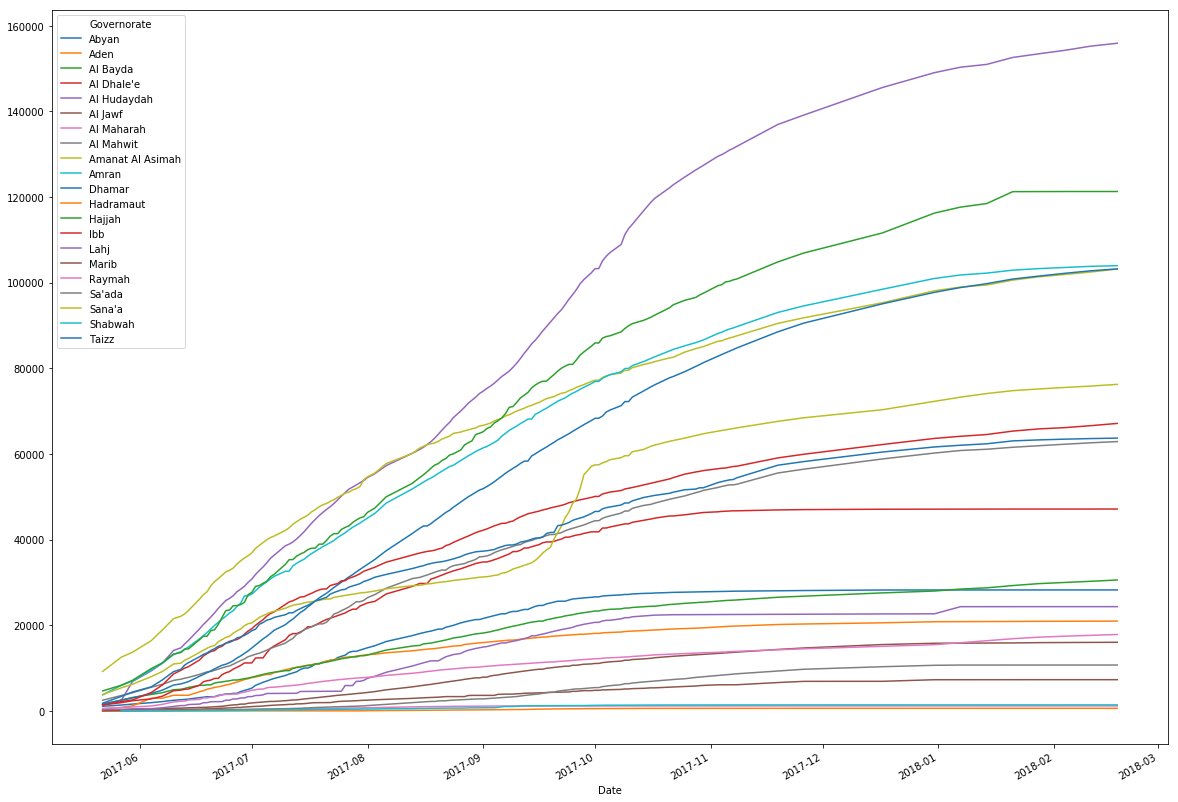

In [12]:
# Matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Tout d'abord, nous créons un tableau croisée des données que nous souhaitons visualiser. Ici, nous nous concentrons sur "Cases", mais vous
# devriez aussi essayer avec d'autres colonnes.
drawing = pd.pivot_table(data_slice, values="Cases", index=["Date"], columns=["Governorate"])
# Et on dessine
drawing.plot(figsize=(20,15), grid=False)

Voilà un résultat qui n'est pas vraiment fameux. Je qualifierais la visualisation ci-dessus de "spahgetti", du fait de toutes ces lignes qui s'entrecroisent et rendent difficile l'interprétation.

Cela nous fournit tout de même des méthodes utiles d'exploration des données pour contextualiser les événements qui sous-tendent à ces données.

Peut-être pourrions-nous à ce stade tenter d'assembler une histoire pour décrire l'épidémie de choléra au Yemen ?


## Données et précision

Confortablement assis devant un ordinateur (que ce soit dans un bureau silencieux, ou dans l'ambiance sonore de votre café favori), on peut facilement être tenté d'accorder toute confiance à un tableau plein de données et de descriptions. Dans ce format tout propre et aligné, ces données donnent une impression d'authenticité.

Cette impression est trompeuse.

Toute donnée reflète l'époque de sa collecte, la méthodologie qui la produit, et le soin avec lequel cette méthodologie a été suivi. Il s'agit de l'échantillon d'un instant donné, et est toujours imparfait.

Les données médicales, produites en interrogeant des patients volontaires, reposent sur les expériences subjectives de ces pateients, et les gens, même lorsqu'ils essayent d'être honnête de de rendre compte de choses non controversées, ont des souvenirs imparfaits. Les échantillons de sang et tissus médicaux dépendent de la systématicité avec laquelle ceux-ci ont été collectés, et de toute la chaîne de collecte, depuis le patient, la clinique, le coursier, le laboratoire et l'anayse de données. Chacune de ces étapes peut créer une erreur : une chute, une contamination, un changement de température non prévu, etc.

Même les données générées de manières autonomes par des capteurs ou des échantillonages numériques reflètent la perspective de ce qu'un être humain a estimé comme important à mesurer, et l'implémentation qu'en ont fait les gens qui interprètent les instructions de collecte et de traitement. Des capteurs peuvent se trouver mal positionnés, mal orientés, mal calibrés, ou tout simplement basés sur de mauvaises hypothèses initiales.

Les données reflètent les biais de ceux qui ont mis en place la recherche, et les espoirs de ceux qui espèrent en tirer des leçons.

Les données sont de fait toujours incertaines, et toute analyse doit le prendre en compte. C'est la raison pour laquelle nous démarrons par des considérations éthiques. Nous devons, dès le départ, être honnêtes avec nous-mêmes.


Dans de futures leçons, nous regarderons des méthodes pour estimer l'incertidude de nos données, et le niveau de confiance que nous pouvons leur accorder. Pour cette leçon, nous allons développer un modèle théorique de cette incertitude et de quelles données nous pouvons utiliser pour batîr notre histoire sur les événements se déroulant au Yemen.

En l'espace de six mois (de mai à novembre 2017), le nombre d'infections au cholera au Yemen est passé de 35.000 à presque 1 million. Plus de 2.000 personnes par mois en décèdent et le taux d'attaque pour 1.000 est passé d'une moyenne de 1 à 30. Ceci pointe vers un désastre hors de contrôle.

Cependant, en parallèle, le taux de mortalité est passé de 1% à 0,2%.

Devrions-nous en tirer une pointe d'optimisme ? Est-ce que les équipes médicales parviennent à maîtriser la maladie au fur et à mesure qu'elle s'étend ?

Il nous faut prendre en compte comment ces données sont collectées - l'environnement dans lequel elles sont collectées.

<br>
<div class="well">
<b><i>Contexte</i></b> : lecture sur les événements au Yemen (Décembre 2017) :
<br>
<ul>
    <li><a href="https://www.hrw.org/news/2017/12/07/yemen-coalition-blockade-imperils-civilians">Yemen: Coalition Blockade Imperils Civilians</a> - Human Rights Watch, 7 December 2017</li>
    <li><a href="https://www.theguardian.com/world/ng-interactive/2016/sep/16/how-saudi-arabias-airstrikes-have-hit-civilian-life-in-yemen">What is happening in Yemen and how are Saudi Arabia's airstrikes affecting civilians</a> - Paul Torpey, Pablo Gutiérrez, Glenn Swann and Cath Levett, The Guardian, 16 September 2016</li>
    <li><a href="http://www.bbc.co.uk/news/world-middle-east-39651265">Saudi 'should be blacklisted' over Yemen hospital attacks</a> - BBC, 20 April 2017</li>
    <li><a href="https://www.usip.org/sites/default/files/SR342_Process-Lessons-Learned-in-Yemens-National-Dialogue.pdf">Process Lessons Learned in Yemen’s National Dialogue</a> - Erica Gaston, USIP, February 2014</li>
</ul>
D'après l'<a href="https://www.unicef.org/media/media_101496.html">UNICEF</a>, en novembre 2017, "plus de 20 millions de gens, dont plus de 11 millions d'enfants, ont un besoin urgent d'assistance humanitaire. Au moins 14,8 millions ne disposent pas de soins de base, et une épisode de choléra a généré plus de 900.000 d'infections supposées."
</div>

Les taux d'incidence du choléra sont collectées dans une zone de guerre active, où les génocides et les violations des droits de l'homme ont lieu quotidiennement. Les hôpitaux sont débordés, et nombre de leurs équipes ont été décimées. La reègle islamique exige l'enterrement aussi rapide que possible des morts, et cela se révèle encore plus important dans une zone de conflits pour limiter l'expansion des maladies.

De ce fait, le plus probable est que les équipes médicales sont débordées, et que leur attention est fixée sur les vivants plutôt que les morts. Ils essayent de soigner un maximum de gens, et c'est un signe de leur professionnalisme et de leur dévouement que les données concernant les victimes du choléra ne puissent plus parvenir jusqu'à l'OMS et l'UNICEF.

Il y a des êtres humains derrière ces données - celles-ci leur ont demandé beaucoup de sacrifices avant qu'elles ne puissent vous parvenir.


Autrement dit, il est certain que le nombre d'infections et de morts représentent un minimum, et que le taux d'attaque et de mortalité sont très probablement sous-estimés. Cette sous-estimation peut laisser penser que le taux de mortalité est en recul par rapport au taux d'infection, mais mieux vaut ne pas s'y fier.

Malgré cela, les organisations humanitaires doivent faire usage de ces données pour préparer leurs interventions. La nourriture, les médicaments et le personnel humaniatire doivent être prêts pour pouvoir intervenir lorsque les combats diminuent suffisamment au Yemen pour y aller. Les journalistes peuvent espérer faire réagir l'opinion publique dans les nations de donneurs (et des nations extérieures qui participent au conflit), en faisant usage de ces données pour expliquer ce qui se passe.

Notre histoire en développement se doit donc d'accepter que le taux d'infection est la seule donnée qui reflète à peu près raisonablement les événements.


## Présentation: simplicité et laisser les données raconter une histoire

Un _data scientist_ (scientifique des données) se doit d'être compétent dans un large éventail d'expertises et dans un énvironnement en évolution rapide, dans lequel les outils et les méthodologies nécessaires à l'exécution de leurs tâches sont en flux constant. Ce travail reste en général hors de vue du public.

La partie de ce travail qui devient exposé au grand public est celle qui concerne la présentation des résultats. Cette partie voit elle-aussi émerger en continu de nouveaux outils et de nouvelles techniques de visualisation.

Tout cela pour souligner que les sections de ce cours concernant la présentation risquent de mal et vite vieillir, et qu'il convient donc d'en retenir avant tout les principes et les méthodes, plus que les outils logiciels spécifiques.

La présentation est toujours une activité clé, que ce soit pour décrire des résultats scientifiques dans un journal académique, pour faire un rapport financier ou une étude de marché pour une entreprise, pour rédiger une article journalistique sur un sujet mouvant, pour convaincre des donneurs et des organisations humanitaires de prendre au sérieux telle ou telle menace environnementale ou médicale.

Il s'agit avant tout d'organiser vos pensées dans une histoire cohérente et crédible.

## Un langage et une approche à à la narration à base des données

Mark Twain, un auteur américain, a écrit "il y a les mensonges, il y a les horribles mensonges, et ensuite il y a les statistiques". Il faut de fait être très prudent en bâtissant une histoire et de s'assurer qu'elle reflète la réalité plutôt que vos propres biais.

D'après Edward Tufte, professeur de statistiques à Yale, [une représentation visuelle se doit de](https://www.edwardtufte.com/tufte/books_be):

 - montrer les données ;
 - inciter le lecteur à penser au sujet, plutôt qu'à la méthodologie, à la conception graphique, la technologie de production graphique, ou quoique ce soit d'autre ;
 - éviter de déformer ce que les données ont à exprimer ;
 - présenter beaucoup de nombres en peu d'espace ;
 - rendre cohérents de larges jeux de données ;
 - encourager l'oeil à comparer différentes données ;
 - révéler les données à plusieurs niveaux de détail, depuis une lecture de survol jusqu'aux structures les plus fines ;
 - répondre à un objectif suffisamment clair : une description, une exploration, une formalisation ou pour la décoration ;
 - être intégré de près aux descriptions statistiques et textuelles d'un jeu de données ;
 
Bien d'autres gens ont exprimés des opinions avisés sur la pratique de la représentation graphique. Manual Lima, sur son blog "Visual Complexity" (complexité visuelle), a défini un [manifeste pour la visualisation de l'information](http://www.visualcomplexity.com/vc/blog/?p=644).

Toute histoire se doit d'avoir un début, un milieu et une conclision. La forme de narration peut varier, mais les meilleurs histoires, celles les mieux retenues, fournissent un contenu attirant et facilement reproduit.

Projet des données dans un paquets de diagrammes dans l'espoir que quelque chose en ressortira ne facilite pas l'implication du lecteur, pas plus que ne le ferait de jouer d'un instrument de musique au hasard.

La narration n'est jamais un accident.

Sun Tzu a dit "il n'y a que 5 notes de musique, mais il serait impossible d'écouter l'ensemble des mélodies que leur combinaison permet".

Vois les types fondamentaux de la réprésentation graphiques dans la boite à outils d'un _data scientist_ :

 - un graphe à courbes ;
 - un graphe à batons ;
 - les variantes de graphes à bâtons et à courbes utilisant la superposition et les surfaces ;
 - les graphes à bulles ;
 - les représentations textuelles ;
 - les cartes choroplèthes ;
 - les plans en arbre ;

Pour améliorer les comparisons de ces graphes, on peut les utiliser sous leur forme "petit-mutiple" (_small multiple_). Les petit multiples sont des graphes simples placés les uns à côté des autres pour encourager l'analyse tout en racontant une histoire crédible. Les axes doivent être constants au travers des différents graphes, et les guides accessoires (comme les lignes de division entre les  graphes et les axes verticaux) sont supprimés. Un simple graphe à courbe devient à la fois moderne et riche en informations présenté de la sorte.

Il existe par ailleurs de nombreux types de graphes spécialisés (tels que [les visages de Chernoff](https://en.wikipedia.org/wiki/Chernoff_face)) mais ceux-ci ont peu de chance d'être fournis de base dans vos logiciels de visualisation.  

Voici une méthode pour bâtir une histoire visuelle :
 
 - écrire un diagramme du flux de la narration qui encapsule chaque composante dans un module ;
 - chaque module doit encapsuler une _pensée_ unique dérivée des données ; le type de graphe s'impose en fonction des données :
   - les séries temporelles peuvent être représentées par des graphes à courbes, ou par des petits-multiples d'autres graphes ;
   - les données géospatiales pointent vers les choroplèthes ;
   - les données complexes à variables multiples peuvent être présentées sous forme de plans en arbre ;
 - en tous les cas, assurez vous d'être guidé par les données et par le bon sens ;
 - disposez ces modules dans une série d'illustrations ;
 - relire et éditer suivant les règles précédentes.

Le développement d'un tableau de bord narratiff avec plusieurs graphes peut être inspiré des règles de George Orwell sur[_La politique et la langue_](http://www.orwell.ru/library/essays/politics/english/e_polit/):

<div class="alert alert-block alert-warning">
<ol>
    <li>Ne jamais utiliser de camembert ; utiliser un tableau à la place.</li>
    <li>Ne jamais utiliser un graphe complexe si un plus simple convient.</li>
    <li>Ne jamais encombrer les données de grilles, tirets, étiquettes ou détails inutiles.</li>
    <li>S'il est possible de supprimer un graphe sans diminuer l'histoire, le supprimer.</li>
    <li>Ne jamais méprendre le lecteur par l'utilisation d'axes ou de visualisation confus ou ambigus.</li>
    <li>Ignorer ces règles plutôt que de produit un résultat atroce.</li>
<ol>
</div>

### Narrer l'histoire d'une épidémie au Yemen

Nous avons traité un grand nombre de points dans cette première lesson, et il est maintenant temps d'aborder la dernière section. Avant d'aller plus loin, il nous faut découvrir deux nouvelles bibliothèques. _GeoPandas_ est à peu près identiques à Pandas, mais permet de traiter les données géospatiales (dont nous allons reparler). _Seaborn_ est similaire à Matplotlib (et est de fait un emballage simplifié de Matplotlib) mais donne des résultats plus jolis, est conçu pour les données statistiques et est plus simple à utiliser.
 
Nous allons tout d'abord améliorer le graphe à courbes que nous avons tracé à la fin de notre [exploration initiale](#Initial-exploration).  J'ai mentionné la notion de _petits multiples_ précédemment, et voici notre première opportunité de l'utiliser. Prenez note de tout ce qui peut être accompli avec seulement quelques lignes de code, dont la plupart servent à formatter les graphes eux-mêmes.

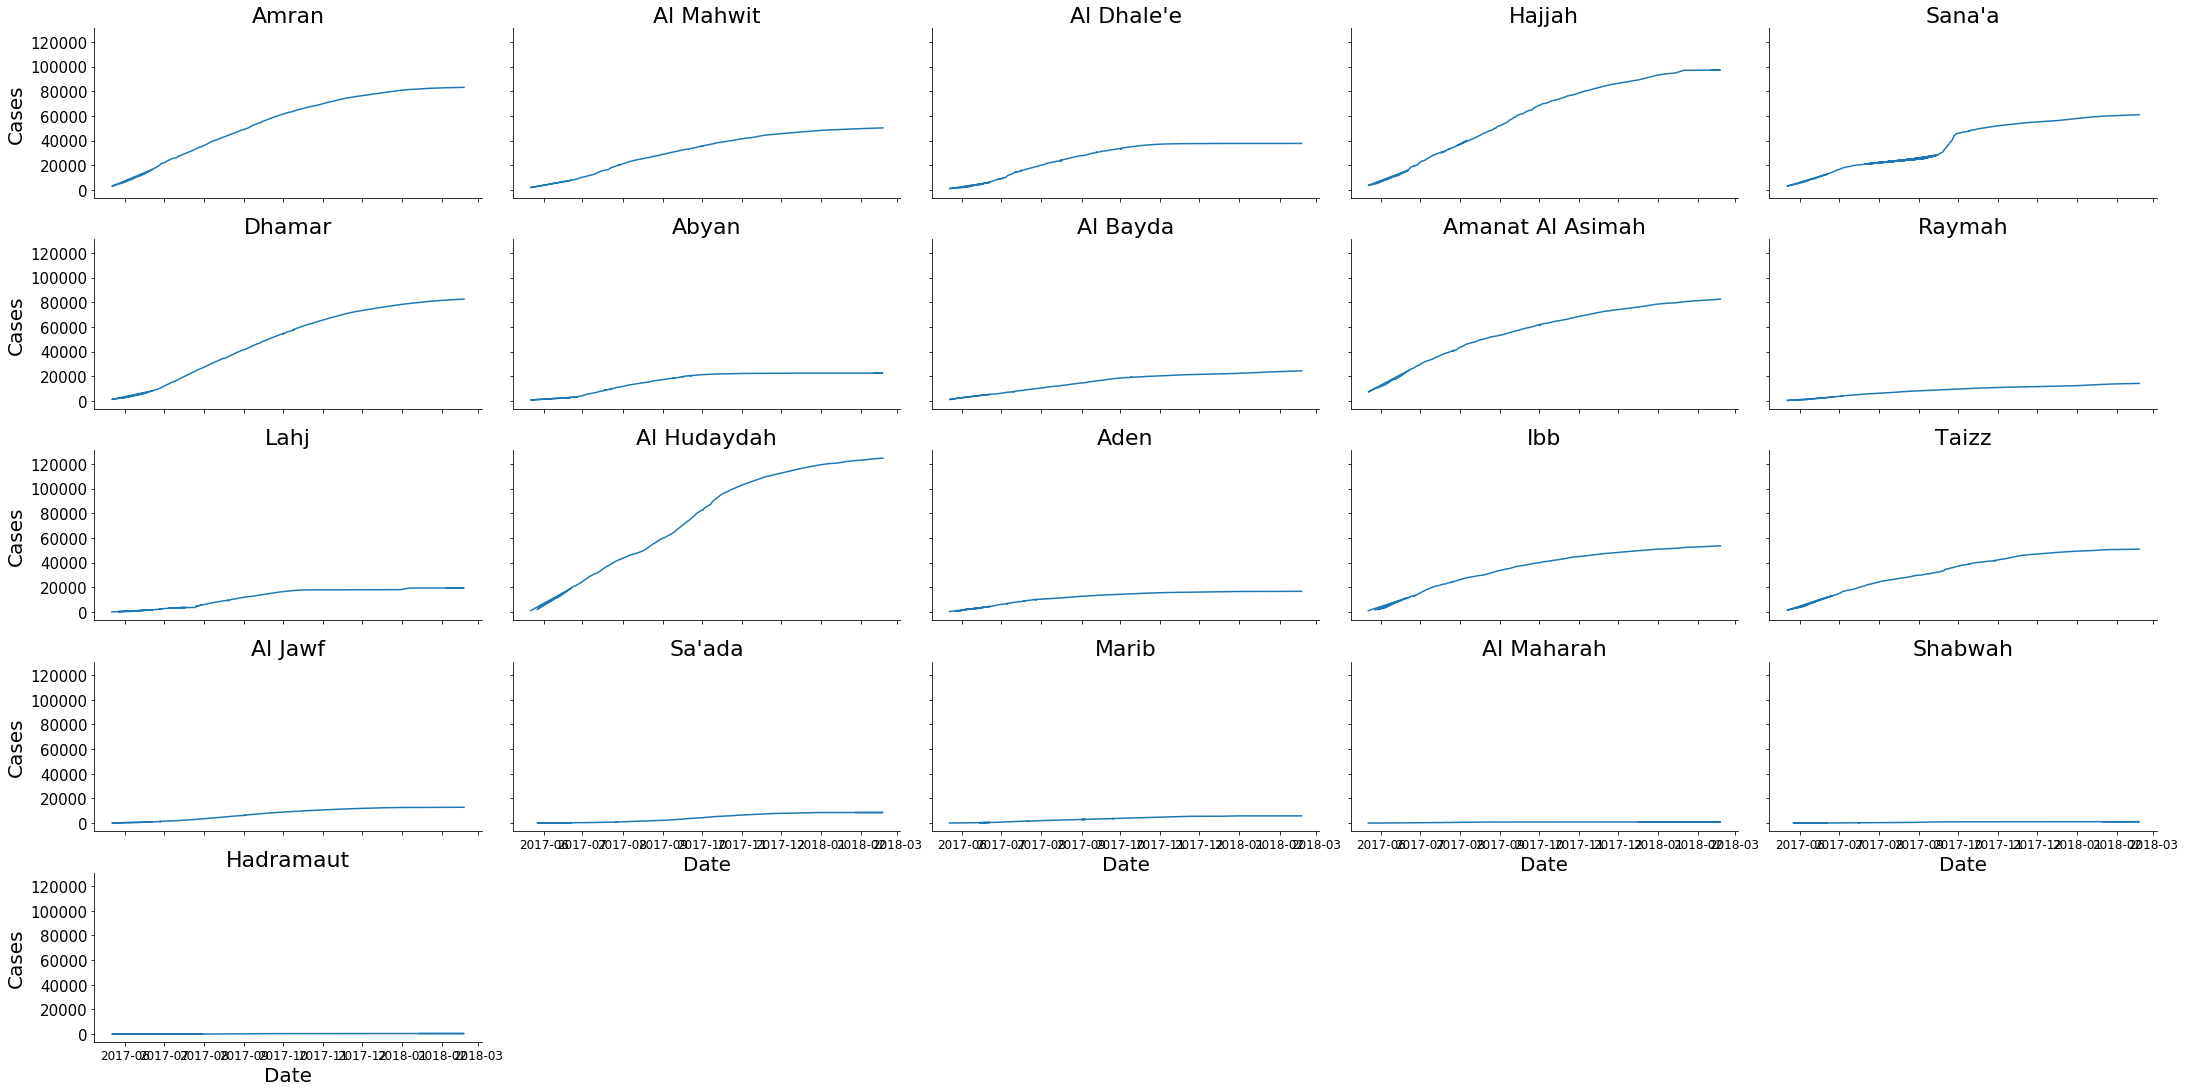

In [15]:
# Seaborn pour tracer et formatter
import seaborn as sns

# Pour tout savoir sur Seaborn FacetGrid
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
sm = sns.FacetGrid(data_slice, col="Governorate", col_wrap=5, height=3, aspect=2, margin_titles=True)
sm = sm.map(plt.plot, "Date", "Cases")
# Nous allons maintenant formatter ces graphes avec les titres et les polices appropriées
sm.set_titles("{col_name}", size=22).set_ylabels(size=20).set_yticklabels(size=15).set_xlabels(size=20).set_xticklabels(size=12)

Prenez note de ce que, même dans un format condensé, il est toujours simple de comprendre ce quui se passe, et la présentation est dans son ensemble agréable et attirante visuellement.

Malheureusement, sauf à bien connaître le Yemen, cette histoire reste incomplète. Il est difficile de voir où ces changements se déroulent, ou comment chaque gouvernorat est lié aux autres dans l'espace géographique. Pour cela, nous avons beson de représenter nos données sur une carte.

Il y a un certain nombre de limites à la représentation de données sur des cartes :

 - une carte choroplèthe est en fait une forme de graphe à bâtons où la hauteur des bâtones est représent par un gradient de couleurs en deux dimensions ;
 - les frontières qui délimitent les régions, les districts (ou les gouvernorats) sont de tailles très différentes et peuvent inciter à tort à interpréter les données en fonction de la taille géographique plutôt que du gradient de couleurs.

Malgré ces limitations, les visualisations à base de cartes sont utiles pour ancrer les données dans un espace physique. En combinaison avec d'autres visualisations (comme celles ci-dessus), il est possible d'assembler une histoire complète.

Pour tracer une carte, il nous faut un fichier de formes - [_shapefile_](http://wiki.openstreetmap.org/wiki/Shapefiles). Il s'agit d'un ensemble de plusieurs fichiers développés suivant un standard de l'[Esri](https://www.esri.com/en-us/home) qui contiennent des formes définies par des points, lignes ou polygones géographiques, ainsi que des fichers supplémentaires avec des métadonnées et des propriétés.

L'HDX a exactement ce qu'il nous faut dans [_Yemen - Administrative Boundaries_](https://data.humdata.org/dataset/yemen-admin-boundaries) (frontières adminstratives du Yemen). Télécharger le shapefile [zip files](https://data.humdata.org/dataset/6b2656e2-b915-4671-bfed-468d5edcd80a/resource/1574d33c-c002-4294-a7c4-89433728c9b3/download/yemen_admin_20171007_shape.zip) dans un répertoire, et dé-zipper les fichiers.

Nous allons maintenant créer un dataframe GeoPandas pour ouvrir le shapefile, et le relier au dataframe de nos données existantes pour pouvoir tracer des cartes.

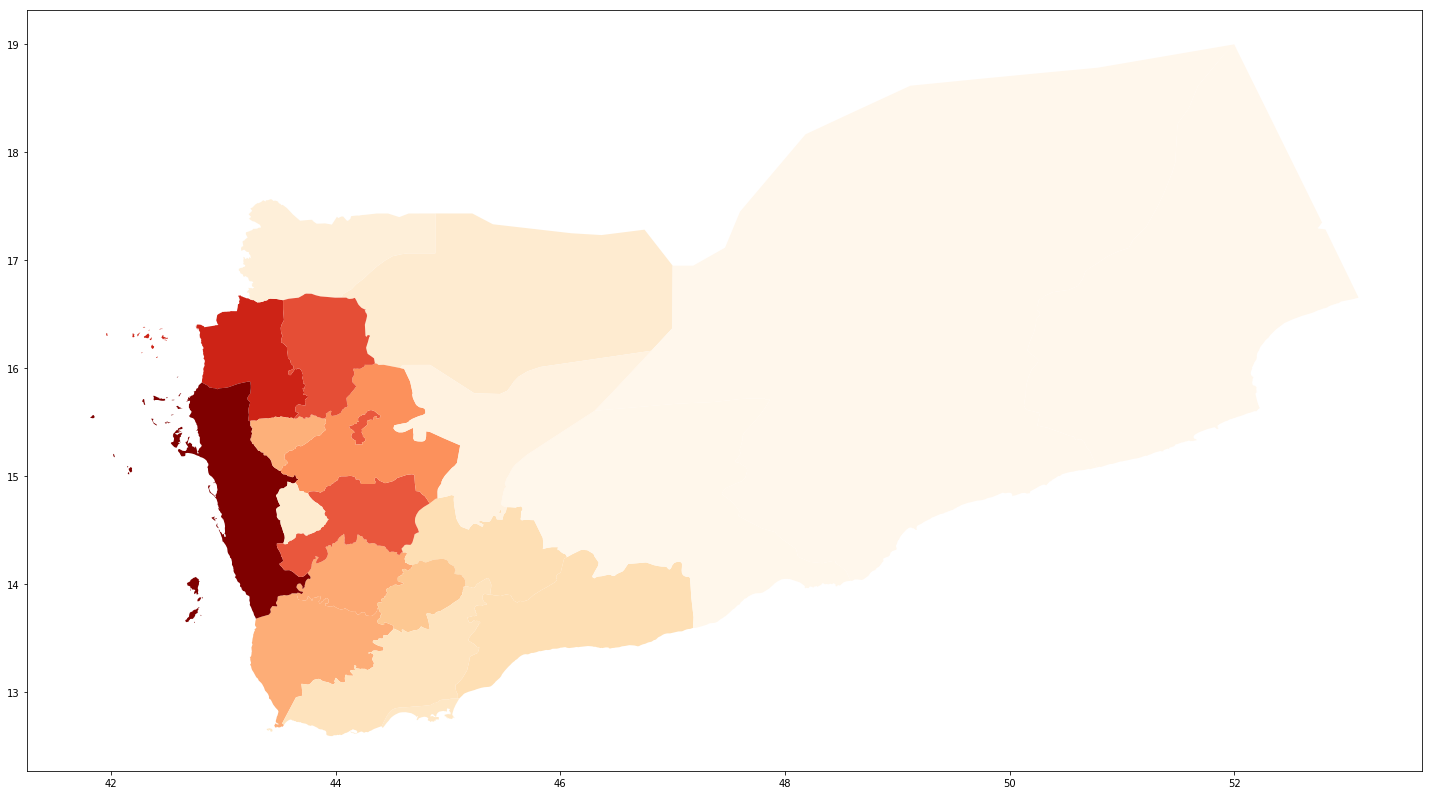

In [17]:
# Import de la bibliothèque GeoPandas
import geopandas as gpd
# Ouvre le shapefile nommé "yem_admin1.shp" ; il faut adapter le chemin vers le fichier
# en fonction de là où il a été sauvegardé
shape_data = gpd.GeoDataFrame.from_file("data/yem_admin1.shp")
# Nous n'avons pas de données pour l'île de Socotra, on peut donc la supprimer de nos données
shape_data = shape_data.loc[~shape_data.name_en.isin(["Socotra"])]
# On peut maintenant lier à nos données existantes pour générer notre données géographiques
map_data = pd.merge(shape_data, data_slice, how="outer", left_on="name_en", right_on="Governorate", indicator=False)

# Traçons une carte

# Tout d'abord, définissons une taille de figure, d'axes et de dessins
fig, ax = plt.subplots(figsize=(25,14))
# Nous allons regarder une date donnée, la dernière de la série
md = map_data.loc[map_data.Date == "2018-01-14"]
# Et on trace
md.plot(ax=ax, column='Cases', cmap='OrRd')

Et là, nous rencontrons une limite fondamentale de la représentation sous forme de cartes... Ce serait bien de montrer une série temporelle de l'évolution des événements.

Rappelons-nous de l'approche des petits multiples ! Pour finir cette première leçon, voici ce à quoi ressemble les petits multiples de cartes.

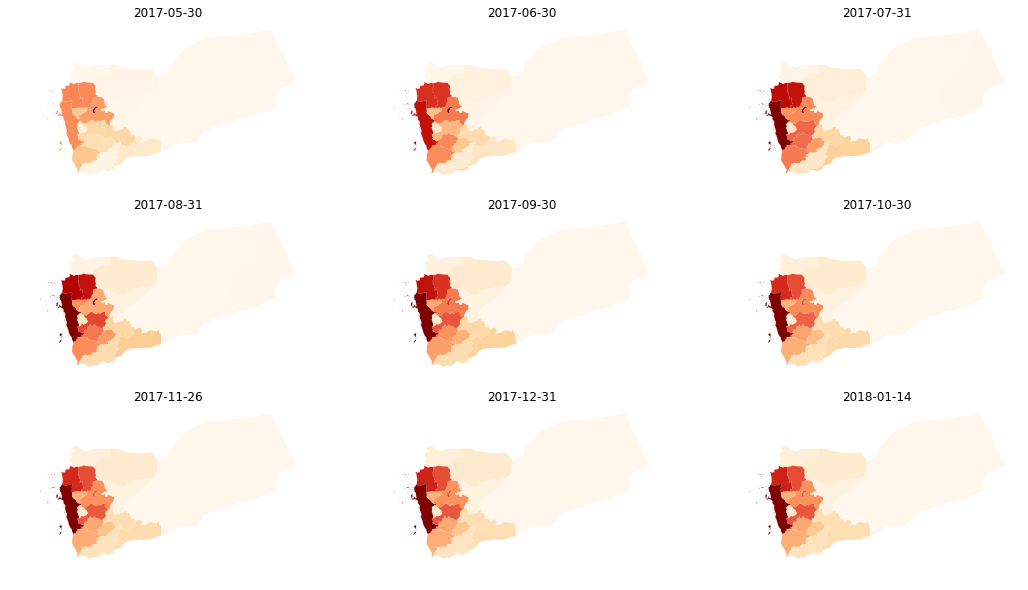

In [18]:
# C'est un peu plus compliqué qu'on ne pourrait le croire. Il faut l'imaginer comme suite:
# Nous allons créer une figure, et itérer sur la série temporelle pour ajouter de nouveaux sous-dessins au fur et à mesure.
# Comme il y a 125 dates (ce qui est plutôt beaucoup), nous allons choisir de nous limiter au dernier jour de chaque
# mois et à la date finale.

# Crée une série de donnée au format de datetime
dates = pd.Series([pd.Timestamp(d) for d in map_data["Date"].unique()])
# Tri sur place
dates.sort_values(inplace = True)
dl = {}
for d in dates:
    # Ceci nous permet d'obtenir le dernier jour de chaque combinaison année-mois
    k = "{}-{}".format(d.year, d.month)
    dl[k] = d
# Récupère et trie la liste de dates uniques
dates = list(dl.values())
dates.sort()

# Crée la figure
fig = plt.figure(figsize=(18,10))
# Définie deux compteurs, first_date and sub_count
first_date = 0
sub_count = 1
# Itère sur les dates, en utilsant "enumerate" compter le nombre d'itération
for i, d in enumerate(dates[:]):
    # Obtient un dataframe pourfor the  le dessin de cette date
    subplot = map_data.loc[map_data.Date == d]
    # Ajoute le dessins approprié pour un tableau structurés en 3 lignes de 3 éléments
    # Si cela généère des erreurs, c'est probablement que Matplotlib s'attend à un nombre différents d'images
    # Vérifier et ajuster
    ax = fig.add_subplot(3, 3, sub_count)
    # Incremente le compteur
    sub_count+=1
    # Quelques ajustements visuels pour ne pas déformer les cartes, et ajout de titres
    ax.set_aspect('equal')
    ax.set_axis_off()
    ax.title.set_text(d.date())
    # et on dessine
    subplot.plot(ax=ax, column='Cases', cmap='OrRd')

In [14]:
# Sauvegarons nos données data_slice et map_slice pour plus tard;
data_slice.to_csv("data/yemen_cholera_data_slice.csv", index=False)
map_data.to_csv("data/yemen_cholera_map_slice.csv", index=False)

NameError: name 'map_data' is not defined

Ceci conclut cette leçon et ce cas d'usage. Vous pouvez bidouiller le code, choisir une colonne différente à visualiser (par example "Deaths"), et explorer les bibliothèque pour apprendre comment présent ces graphes.

[(précédent)](04%20-%20-%20-%20Python%20-%20tools%20-%20for%20-%20data%20-%20analysis.ipynb) | [(index)](00%20-%20-%20-%20Introduction%20-%20to%20-%20Python.ipynb) | [(suivant)](06%20-%20-%20-%20JavaScript%20-%20tools%20-%20for%20-%20visualisation.ipynb)